In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


## Explore the Data (EDA)

In [2]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.drop(columns=['customer_id'],inplace=True)

In [5]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


In [6]:
# Display summary statistics of numerical columns
print(df.describe())

       credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.0

In [7]:
# Count the number of missing values in each column
print(df.isnull().sum())

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [8]:
# Count the number of duplicated values 
df.duplicated().sum()

0

/tmp/ipykernel_20/141441602.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


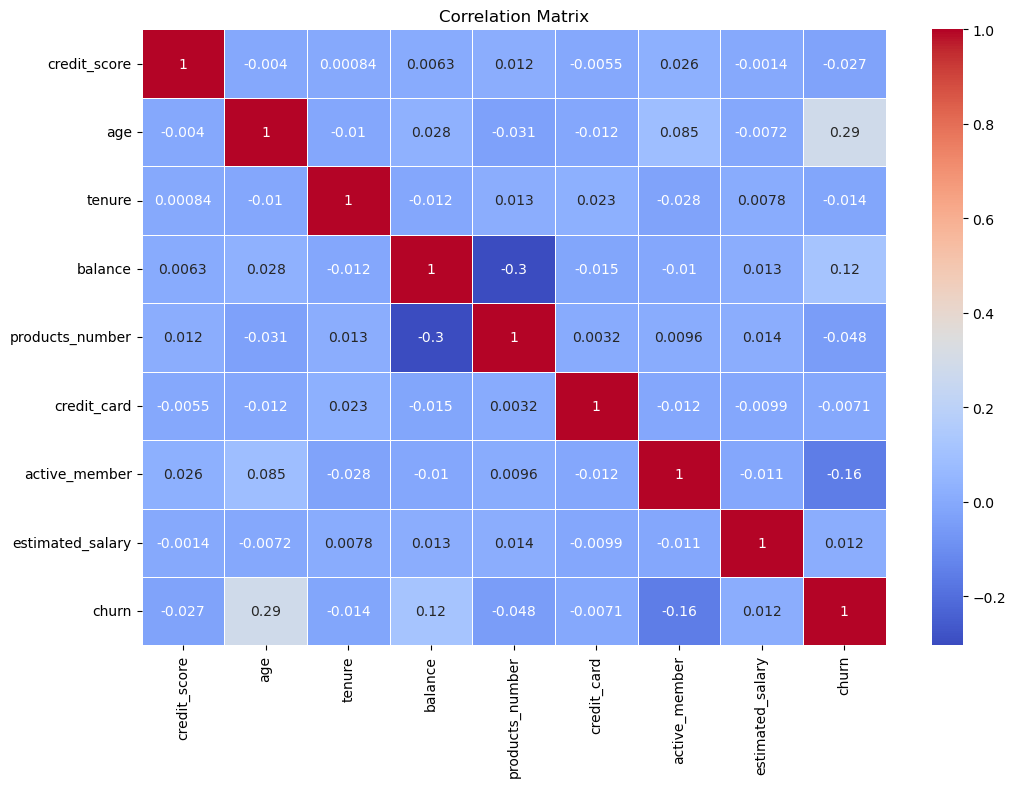

In [9]:
# Visualize the correlation matrix using a heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

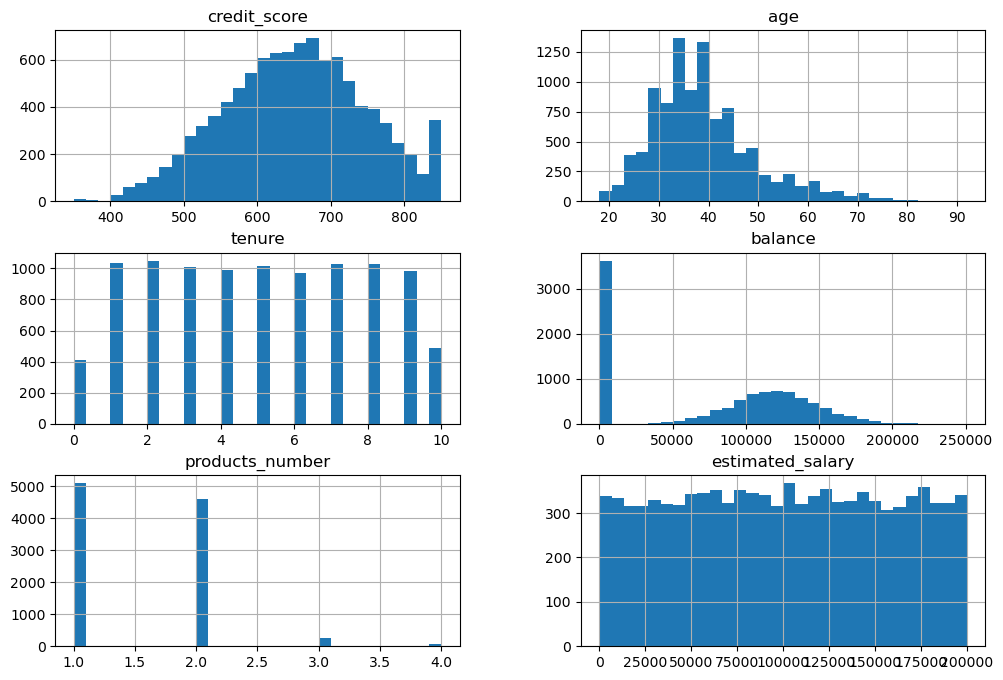

In [10]:
# Visualize the distribution of numeric features
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
df[numeric_features].hist(bins=30, figsize=(12, 8))
plt.show()

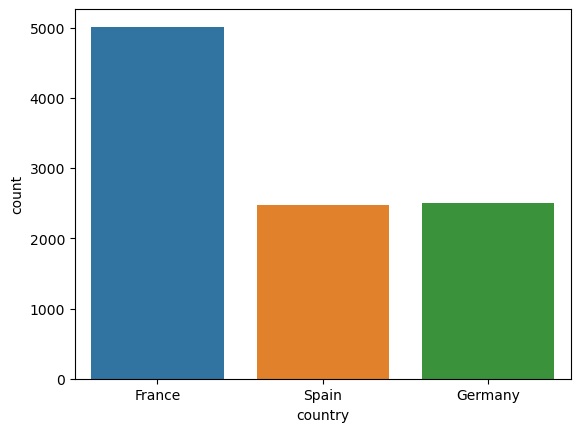

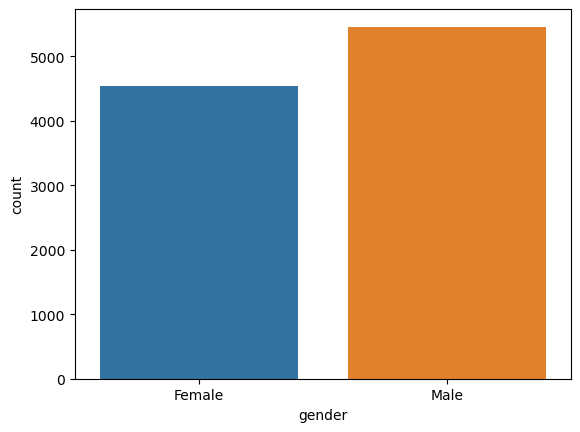

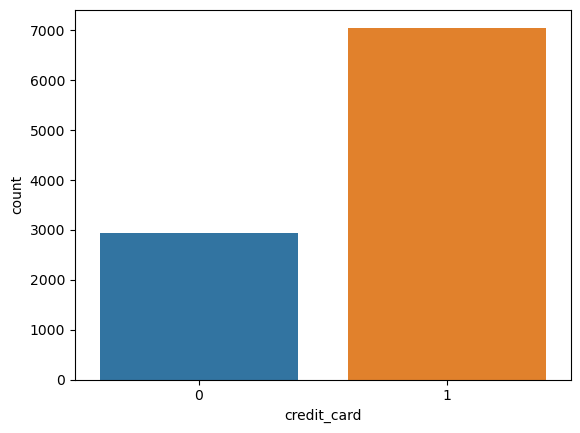

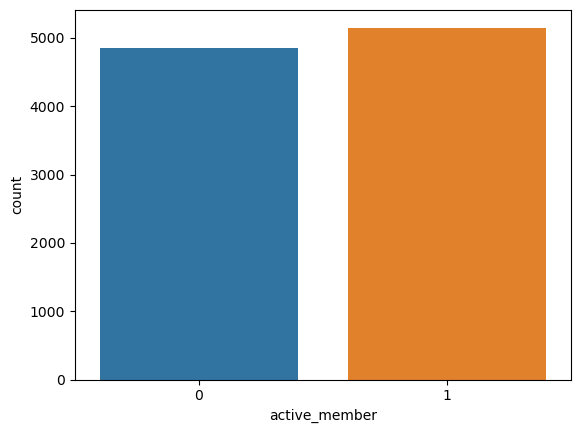

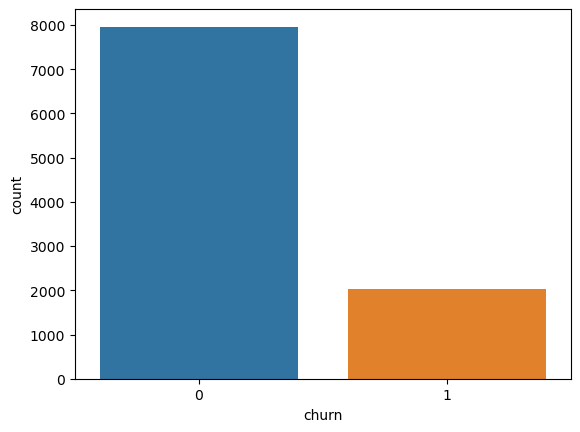

In [11]:
# Visualize the distribution of categorical features
categorical_features = ['country', 'gender', 'credit_card', 'active_member', 'churn']
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.show()

In [12]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

## Data Preprocessing 

In [13]:
#encoding categorical features
df=pd.get_dummies(df,columns=['country','gender'],drop_first=True)
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
#Data Split
X=df.drop(columns=["churn"])
y=df['churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
X_train

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
9382,645,38,7,59568.57,1,1,1,167723.25,0,0,0
8772,768,30,6,0.00,2,1,1,199454.37,0,0,1
3609,850,40,6,94607.08,1,1,0,36690.49,1,0,1
85,652,75,10,0.00,2,1,1,114675.75,0,1,0
4681,708,44,2,161887.81,2,1,0,84870.23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7771,850,29,1,154640.41,1,1,1,164039.51,1,0,1
936,775,52,8,109922.61,1,1,1,96823.32,0,0,1
9903,606,36,10,0.00,2,0,1,155641.46,0,0,0
8954,664,54,8,0.00,1,1,1,162719.69,0,0,1


In [16]:
y_train

9382    0
8772    0
3609    0
85      0
4681    0
       ..
7771    0
936     1
9903    0
8954    1
2149    1
Name: churn, Length: 8000, dtype: int64

In [17]:
#Scale the Data
from sklearn.preprocessing import StandardScaler 
Scaler = StandardScaler()
X_trained_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [18]:
X_trained_scaled

array([[-0.06187166, -0.08805073,  0.68172806, ..., -0.58100686,
        -0.58119931, -1.09609805],
       [ 1.21699479, -0.84456119,  0.33720345, ..., -0.58100686,
        -0.58119931,  0.91232714],
       [ 2.06957242,  0.10107689,  0.33720345, ...,  1.72115008,
        -0.58119931,  0.91232714],
       ...,
       [-0.4673659 , -0.27717834,  1.71530186, ..., -0.58100686,
        -0.58119931, -1.09609805],
       [ 0.13567681,  1.4249702 ,  1.02625266, ..., -0.58100686,
        -0.58119931,  0.91232714],
       [ 1.92401038,  1.70866162, -0.35184575, ..., -0.58100686,
         1.72058015,  0.91232714]])

In [19]:
X_test_scaled

array([[ 1.94480496, -0.46630596,  1.02625266, ..., -0.58100686,
        -0.58119931, -1.09609805],
       [ 1.78884564, -0.08805073, -1.38541956, ..., -0.58100686,
        -0.58119931,  0.91232714],
       [-1.86060252,  0.10107689, -0.35184575, ..., -0.58100686,
         1.72058015,  0.91232714],
       ...,
       [ 1.33136496,  0.1956407 ,  1.71530186, ..., -0.58100686,
        -0.58119931, -1.09609805],
       [ 2.06957242,  1.4249702 , -0.35184575, ..., -0.58100686,
         1.72058015, -1.09609805],
       [-1.7046432 ,  0.57389593, -1.04089496, ..., -0.58100686,
        -0.58119931,  0.91232714]])

## Model training and Evalution

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

There are 2 types of models in keras Sequential or Non-Sequential

In [21]:
# #Create a sequential model
# model=Sequential()
# #Add a hidden layer with 3 units and sigmoid activation function, expecting input of dimension 11
# model.add(Dense(3,activation='sigmoid',input_dim=11))
# #Add an output layer with 1 unit and sigmoid activation function
# model.add(Dense(1,activation='sigmoid'))

Increase layers

In [22]:
#Create a sequential model
model=Sequential()
#Add a hidden layer with 11 units and relu activation function, expecting input of dimension 11
model.add(Dense(11,activation='relu',input_dim=11))
#Add a hidden layer with 11 units
model.add(Dense(11,activation='relu'))
#Add an output layer with 1 unit and sigmoid activation function
model.add(Dense(1,activation='sigmoid'))

In [23]:
#Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [24]:
# #Compile the model with binary crossentropy loss and Adam optimizer
# model.compile(loss='binary_crossentropy',optimizer='Adam')

In [25]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [26]:
#Train the model using the scaled training data (X_trained_scaled) and training labels (y_train) for 100 epochs
#taking validation data of 20% from train dataset for varification purpose
history=model.fit(X_trained_scaled,y_train,epochs=100,validation_split=0.2)


Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5101 - accuracy: 0.7931 - val_loss: 0.4536 - val_accuracy: 0.8025
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8006 - val_loss: 0.4306 - val_accuracy: 0.8069
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8039 - val_loss: 0.4192 - val_accuracy: 0.8106
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8073 - val_loss: 0.4101 - val_accuracy: 0.8163
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8109 - val_loss: 0.4027 - val_accuracy: 0.8188
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8172 - val_loss: 0.3945 - val_accuracy: 0.8338
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8269 - val_loss: 0.3863 - val_accuracy: 0.8350

In [27]:
#Get the weights of the first hidden layer
first_hidden_layer_weights = model.layers[0].get_weights()

#Get the weights of the second hidden layer
second_hidden_layer_weights = model.layers[1].get_weights()

#Get the weights of the output layer
output_layer_weights = model.layers[2].get_weights()

#Print the weights of the first hidden layer
print("Weights of the first hidden layer:")
print(first_hidden_layer_weights)

#Print the weights of the second hidden layer
print("Weights of the second hidden layer:")
print(second_hidden_layer_weights)

#Print the weights of the output layer
print("Weights of the output layer:")
print(output_layer_weights)

Weights of the first hidden layer:
[array([[-0.37485993,  0.25200105, -0.20358928, -0.07748952,  0.36767432,
         0.01993146,  0.18381703,  0.04540639,  0.1072081 , -0.00640515,
        -0.09443746],
       [-0.29344827, -0.36341798,  0.73311585, -0.04280004, -0.22374569,
         0.58849764, -0.10287017, -0.53189206, -0.01543377,  1.0368025 ,
        -0.05605622],
       [ 0.2935663 , -0.35304388,  0.6386661 ,  0.244498  ,  0.03545868,
         0.10955866,  0.01808418, -0.17722452,  0.09425853, -0.23686256,
        -0.23159876],
       [ 0.44607976, -0.07171049, -0.50047874, -0.8718496 ,  0.6885333 ,
         0.5728347 , -0.00411256, -0.12369297, -0.1522355 , -0.440967  ,
        -0.28280094],
       [-0.30420896,  0.5722923 ,  0.7848615 , -0.6414242 , -0.24207082,
         0.9485813 , -0.3374119 , -0.31609267, -0.59588   , -1.069063  ,
         1.0237285 ],
       [ 0.383359  , -0.1754739 ,  0.01784547, -0.47032073, -0.5162708 ,
        -0.35229054, -0.12790821,  0.18968722,  0.2

In [28]:
#do prediction for X_test
model.predict(X_test_scaled)
#we are not getting 0/1 because output is passed through sigmoid function which is giving probability in output

63/63 [==============================] - 0s 1ms/step


array([[0.02108367],
       [0.02815583],
       [0.44134825],
       ...,
       [0.20552649],
       [0.8311163 ],
       [0.06060871]], dtype=float32)

In [29]:
y_log=model.predict(X_test_scaled)
#if y_pred is greater than 0.5 then show output as 1 nor 0
y_pred=np.where(y_log>0.5,1,0)

63/63 [==============================] - 0s 1ms/step


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8525

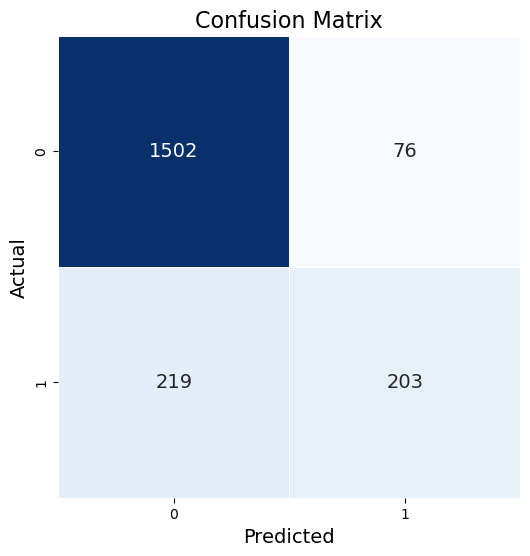

In [31]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, square=True)

plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

In [32]:
history.history

{'loss': [0.5100734829902649,
  0.447933554649353,
  0.43038681149482727,
  0.4199832081794739,
  0.4106912910938263,
  0.4020922780036926,
  0.39272820949554443,
  0.38376104831695557,
  0.37432217597961426,
  0.3660317361354828,
  0.35861602425575256,
  0.35370784997940063,
  0.34892502427101135,
  0.3454679250717163,
  0.3431639075279236,
  0.3408574163913727,
  0.33901286125183105,
  0.33757564425468445,
  0.3357045352458954,
  0.3347688317298889,
  0.33319294452667236,
  0.333179235458374,
  0.3323165774345398,
  0.3314869701862335,
  0.3302456736564636,
  0.3300926983356476,
  0.32973402738571167,
  0.3290855884552002,
  0.3285553753376007,
  0.327834814786911,
  0.3276353180408478,
  0.32731521129608154,
  0.3268018066883087,
  0.32576918601989746,
  0.3261975944042206,
  0.32539403438568115,
  0.3252103924751282,
  0.3254420757293701,
  0.324880987405777,
  0.3244026303291321,
  0.3242518901824951,
  0.3238610327243805,
  0.32331517338752747,
  0.3234991431236267,
  0.323184370

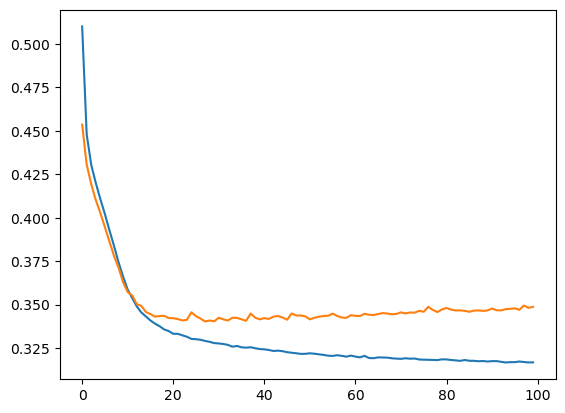

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 

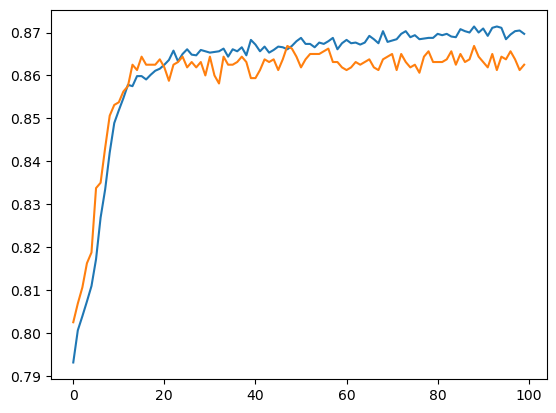

In [34]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 

In [35]:
# Save the trained model
model.save('churn_prediction_model.h5')

print("Model saved successfully!")


Model saved successfully!


In [36]:
from IPython.display import FileLink

FileLink('churn_prediction_model.h5')

/kaggle/working/churn_prediction_model.h5